# Testing Stopwords, Stemming and Lemmatization

## Portuguese Stopwords

In [1]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('portuguese')

# Remover algumas palavras da lista, p.ex. "não" para manter a negação
stopwords_list.remove('não')

print(stopwords_list)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos',

In [2]:
text = "Esta unidade curricular de Processamento de Linguagem Natural é extremamente divertida e útil porque nos ajuda a desenvolver novas competências no campo da Aprendizagem Computacional"

In [3]:
' '.join([w for w in text.split() if w not in stopwords_list])

'Esta unidade curricular Processamento Linguagem Natural extremamente divertida útil porque ajuda desenvolver novas competências campo Aprendizagem Computacional'

## Stemming

Stemming is the process of producing morphological variants of a root/base word

In [4]:
from nltk.stem import PorterStemmer, RSLPStemmer
from nltk.stem.snowball import PortugueseStemmer

ps = PorterStemmer()
snb = PortugueseStemmer()
rslp = RSLPStemmer()

text_list = text.split()

print("Porter Stemmer:\n", ' '.join([ps.stem(w) for w in text_list]))
print("\nSnowball Portugue Stemmer:\n", ' '.join([snb.stem(w) for w in text_list]))
print("\nRSLP Stemmer:\n",' '.join([rslp.stem(w) for w in text_list]))

Porter Stemmer:
 esta unidad curricular de processamento de linguagem natur é extremament divertida e útil porqu no ajuda a desenvolv nova competência no campo da aprendizagem computacion

Snowball Portugue Stemmer:
 esta unidad curricul de process de linguag natural é extrem divert e útil porqu nos ajud a desenvolv nov competent no camp da aprendizag computacional

RSLP Stemmer:
 est unidad curricul de process de lingu natur é extrem divert e útil porqu no ajud a desenvolv nov compet no camp da aprendiz computac


#### Dataset

In [5]:
import pandas as pd

dataset = pd.read_excel('./data/OpArticles_ADUs.xlsx')

Base code to test the different Stemmers with a TfidfVectorizer and ComplementNB Classifier, later compare their metrics

In [6]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import time

stopwords_list = stopwords.words('portuguese')
stopwords_list.remove('não')

vectorizer = TfidfVectorizer()

y = dataset['label']

In [7]:
def test_stemmer(stemmer):
    corpus = []

    # Preprocess
    start = time.time()
    for i in range(0, dataset['tokens'].size):
        # get review, remove and lowercase non alpha chars
        review = re.sub('[^a-zA-Z\u00C0-\u00ff]', ' ', dataset['tokens'][i]).lower()
        # split into tokens, apply stemming and remove stop words
        review = ' '.join([stemmer.stem(w) for w in review.split() if w not in stopwords_list])
        corpus.append(review)
    stop = time.time()
    print("Preprocess time: %0.2fs" % (stop - start))
    print("Corpus Set length: ", len(set(corpus)))

    print("\n", corpus[:5])

    # Fit vectorizer
    X = vectorizer.fit_transform(corpus).toarray()
    print("\n(Number of samples, Number of features):", X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

    start = time.time()
    clf = ComplementNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    stop = time.time()

    print("\nModel time: %0.2fs" % (stop - start))
    print("\nClassification report:\n", classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=clf.classes_), display_labels=clf.classes_).plot()


### Porter

Preprocess time: 4.14s
Corpus Set length:  11761

 ['facto não apena fruto ignorância', 'havia humor jornalismo investigação preocupação aprofundar contextualizar história isenção relato preocupação social urgência denunciar muita peça realment jornalística', 'tudo cómico fifa', 'todo permitimo organização faça totalment absurdo sentido', 'não fazem rir custa poderoso']

(Number of samples, Number of features): (16743, 15170)

Model time: 0.85s

Classification report:
               precision    recall  f1-score   support

        Fact       0.44      0.42      0.43       733
      Policy       0.28      0.43      0.34       133
       Value       0.61      0.60      0.60      1621
    Value(+)       0.35      0.33      0.34       282
    Value(-)       0.46      0.47      0.46       580

    accuracy                           0.51      3349
   macro avg       0.43      0.45      0.43      3349
weighted avg       0.51      0.51      0.51      3349



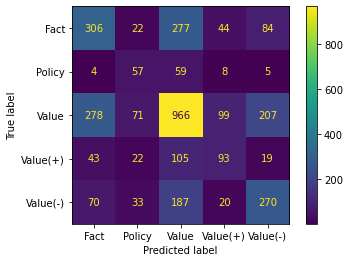

In [8]:
test_stemmer(ps)

### Portuguese Snowball

Preprocess time: 4.63s
Corpus Set length:  11753

 ['fact nã apen frut ignor', 'hav humor jornal investig preocup aprofund contextualiz histór isençã relat preocup social urgênc denunc muit pec realment jornalíst', 'tud cómic fif', 'tod permit organiz fac total absurd sent', 'nã faz rir cust poder']

(Number of samples, Number of features): (16743, 9148)

Model time: 0.52s

Classification report:
               precision    recall  f1-score   support

        Fact       0.45      0.41      0.43       733
      Policy       0.21      0.29      0.25       133
       Value       0.60      0.61      0.60      1621
    Value(+)       0.34      0.32      0.33       282
    Value(-)       0.48      0.48      0.48       580

    accuracy                           0.51      3349
   macro avg       0.42      0.42      0.42      3349
weighted avg       0.51      0.51      0.51      3349



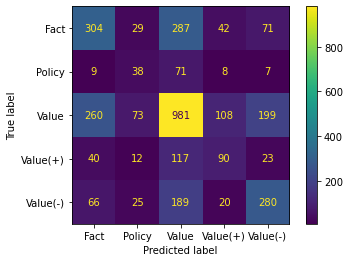

In [9]:
test_stemmer(snb)

### RSLP

Preprocess time: 7.98s
Corpus Set length:  11753

 ['fact não apen frut ignor', 'hav hum jorn investig preocup aprofund contextual histór isenç relat preocup soc urg denunci muit peç real jorn', 'tud cómic fif', 'tod permit organiz faç total absurd sent', 'não faz rir cust poder']

(Number of samples, Number of features): (16743, 8256)

Model time: 0.46s

Classification report:
               precision    recall  f1-score   support

        Fact       0.44      0.41      0.42       733
      Policy       0.24      0.31      0.27       133
       Value       0.59      0.60      0.59      1621
    Value(+)       0.34      0.33      0.33       282
    Value(-)       0.46      0.46      0.46       580

    accuracy                           0.50      3349
   macro avg       0.41      0.42      0.42      3349
weighted avg       0.50      0.50      0.50      3349



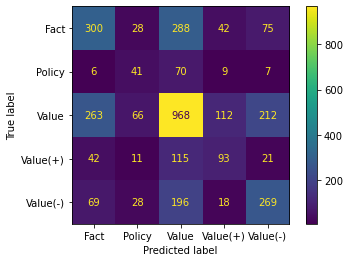

In [10]:
test_stemmer(rslp)

## Lemmatization

In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words.

NLTK does not contain any Portuguese lemmatizer, so we will be using Spacy

In [11]:
import spacy

nlp = spacy.load('pt_core_news_sm')

print("Lemmatization:\n", ' '.join([token.lemma_ for token in nlp(text)]))

C:\Users\fmna\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'pt_core_news_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Lemmatization:
 Esta unidade curricular de Processamento de Linguagem Natural ser extremamente divertir e útil porque o ajudar o desenvolver novo competência o campar da Aprendizagem Computacional


In [12]:
print(nlp(text))

Esta unidade curricular de Processamento de Linguagem Natural é extremamente divertida e útil porque nos ajuda a desenvolver novas competências no campo da Aprendizagem Computacional


Preprocess time: 114.72s
Corpus Set length:  11781

 ['facto não apenas frutar ignorância', 'haver humor jornalismo   investigação   preocupação aprofundar contextualizar história   isenção relatar   preocupação social   urgência denunciar   muito pedir realmente jornalístico', 'tudo cómico fifa', 'todo permitir organização fazer totalmente absurdo sentir', 'não fazer rir custar poderoso']

(Number of samples, Number of features): (16743, 10310)

Model time: 0.65s

Classification report:
               precision    recall  f1-score   support

        Fact       0.44      0.40      0.42       733
      Policy       0.22      0.32      0.26       133
       Value       0.60      0.60      0.60      1621
    Value(+)       0.35      0.34      0.35       282
    Value(-)       0.47      0.46      0.47       580

    accuracy                           0.50      3349
   macro avg       0.42      0.43      0.42      3349
weighted avg       0.50      0.50      0.50      3349



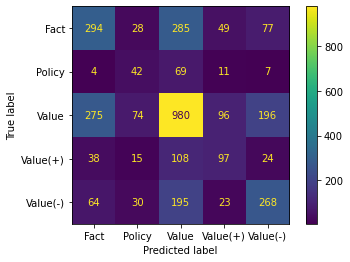

In [13]:
corpus = []

# Preprocess
start = time.time()
for i in range(0, dataset['tokens'].size):
    # get review, remove and lowercase non alpha chars
    review = re.sub('[^a-zA-Z\u00C0-\u00ff]', ' ', dataset['tokens'][i]).lower()
    # split into tokens, apply stemming and remove stop words
    review = ' '.join([token.lemma_ for token in nlp(review) if token.text not in stopwords_list])
    corpus.append(review)
stop = time.time()
print("Preprocess time: %0.2fs" % (stop - start))
print("Corpus Set length: ", len(set(corpus)))

print("\n", corpus[:5])

# Fit vectorizer
X = vectorizer.fit_transform(corpus).toarray()
print("\n(Number of samples, Number of features):", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

start = time.time()
clf = ComplementNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
stop = time.time()

print("\nModel time: %0.2fs" % (stop - start))
print("\nClassification report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=clf.classes_), display_labels=clf.classes_).plot()

## Conclusions

The _Porter Stemmer_  had similar metrics to the others, but it does not make sense to use it since it is not a Stemmer aimed to Portuguese text, was only used as a matter of comparison.

We will use the _RSLP Stemmer_ as it trims more the word endings and leads to less features, causing smaller matrixes for the classifiers and thus faster times and less resources.
Even though the preprocess time was double compared to the _Snowball Portuguese Stemmer_, the metrics are simliar, and it is only run once in the preprocess before the classification tasks, so the advantages outweight this disavantage.

Lemmatization lead to similar scores but with a lot higher preprocessing times. Although this would not be a big issue since the preprocessing will be run only in the beginning of the classification notebook, we opted not to explore further this technique